In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

### LOGISTIC REGRESSION CLASS CREATION

-----


In [2]:
class Logistic_regression():

    """Apply a Logistic Regression model and calculate the importance of predictor variables for the model.
    """

    def __init__(self, dataframe, response_variable, title_dataframe):

        """Constructor method.
        Parameters: Dataframe for application of model, response variable and title.
        """

        self.dataframe = dataframe
        self.response_variable = response_variable
        self.title_dataframe = title_dataframe


    def fit_model(self):

        """Fits a logistic regression model on the given dataset, dividing it into separate training and testing sets.
        Parameters: None
        Returns: None
        """

        X = self.dataframe.drop(self.response_variable, axis = 1)
        y = self.dataframe[self.response_variable]

        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

        self.log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

        self.log_reg.fit(self.x_train, self.y_train)

        self.y_pred_train = self.log_reg.predict(self.x_train)
        self.y_pred_test = self.log_reg.predict(self.x_test)


    def print_confusion_matrix(self):

        """Print confusion matrix.
        Parameters: None
        Returns: None
        """

        mat_lr1 = confusion_matrix(self.y_test, self.y_pred_test)

        my_heatmap_palette = LinearSegmentedColormap.from_list('Gradient', ['lightcyan', 'mediumturquoise', 'teal'], N=1000)

        plt.figure(figsize = (6, 6))
        sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = my_heatmap_palette)

        plt.title(f'{self.title_dataframe.upper()} CONFUSION MATRIX', fontsize = 12, color = 'darkslategray', fontweight = "bold")
        plt.xlabel('Predicted Value')
        plt.ylabel('Actual Value')
        plt.show()


    def get_metrics(self, model_name):

        """Create a dataframe showing the model's metrics, divided between the train and test sets.
        Parameters: None
        Returns: Dataframe containing model metrics.
        """
        
        accuracy_test = accuracy_score(self.y_test, self.y_pred_test)
        precision_test = precision_score(self.y_test, self.y_pred_test)
        recall_test = recall_score(self.y_test, self.y_pred_test)
        f1_test = f1_score(self.y_test, self.y_pred_test)
        kappa_test = cohen_kappa_score(self.y_test, self.y_pred_test)

        accuracy_train = accuracy_score(self.y_train, self.y_pred_train)
        precision_train = precision_score(self.y_train, self.y_pred_train)
        recall_train = recall_score(self.y_train, self.y_pred_train)
        f1_train = f1_score(self.y_train, self.y_pred_train)
        kappa_train = cohen_kappa_score(self.y_train, self.y_pred_train)
            
        dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                            'precision': [precision_test, precision_train],
                            'recall': [recall_test, recall_train], 
                            'f1': [f1_test, f1_train],
                            'kappa': [kappa_test, kappa_train],
                            'set': ['test', 'train']})
        
        dataframe['model'] = model_name

        return dataframe   
    

    def create_df_feature_importance(self):

        """Create a dataframe showing the importance of the features for the model.
        Parameters: None
        Returns: Dataframe containing model the importance of the features.
        """

        coefficients = self.log_reg.coef_[0]

        self.predictors_sig_dataframe = pd.DataFrame({'predictor': self.x_train.columns, 'coeficiente': coefficients})

        self.predictors_sig_dataframe['importance'] = abs(self.predictors_sig_dataframe['coeficiente'])
        self.predictors_sig_dataframe.sort_values(by='importance', ascending=False, inplace=True)

        return self.predictors_sig_dataframe


    def create_barplot_feature_importance(self):

        """Create a barplot showing the importance of the features for the model.
        Parameters: None
        Returns: None
        """

        my_barplot_palette = LinearSegmentedColormap.from_list('Gradient', ['teal', 'mediumturquoise', 'paleturquoise'])
        num_bars = (len(self.dataframe.columns) -1)

        plt.figure(figsize=(10,6))
        sns.barplot(x = 'importance', y = 'predictor', data = self.predictors_sig_dataframe, palette= my_barplot_palette(np.linspace(0, 1, num_bars)))
        plt.title(f'{self.title_dataframe.upper()} LOGISTIC REGRESSION FEATURE IMPORTANCE', fontsize = 12, color = 'darkslategray', fontweight = 'bold')
        plt.show()

### LOGISTIC REGRESSION ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [3]:
df_over = pd.read_pickle('../data/generated_data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [4]:
response_var = 'TenYearCHD'

In [5]:
title_df_over = 'over_sample'

In [6]:
log_regression_over = Logistic_regression(df_over, response_var, title_df_over)

In [7]:
log_regression_over.fit_model()

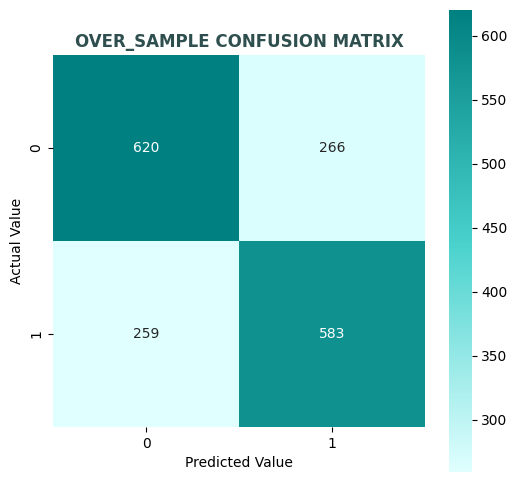

In [8]:
log_regression_over.print_confusion_matrix()

The confusion matrix is unsatisfactory since there are more false positives and false negatives than desired. However, they are evenly balanced, with the model predicting an equal amount of false negatives and false positives.

In [9]:
lr_over_results = log_regression_over.get_metrics('OVER Logistic Regression')
lr_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.696181,0.686690,0.692399,0.689533,0.392092,test,OVER Logistic Regression
1,0.676427,0.673614,0.698085,0.685632,0.352517,train,OVER Logistic Regression


In [10]:
log_regression_over.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.900522,0.900522
9,sysBP,0.386810,0.386810
7,cigsPerDay,0.357800,0.357800
1,BMI_category,0.311801,0.311801
3,prevalentStroke,0.267801,0.267801
8,totChol,0.201734,0.201734
18,sex_M,0.167419,0.167419
17,sex_F,-0.167239,0.167239
14,education_2.0,-0.147400,0.147400
20,is_smoking_YES,0.128962,0.128962


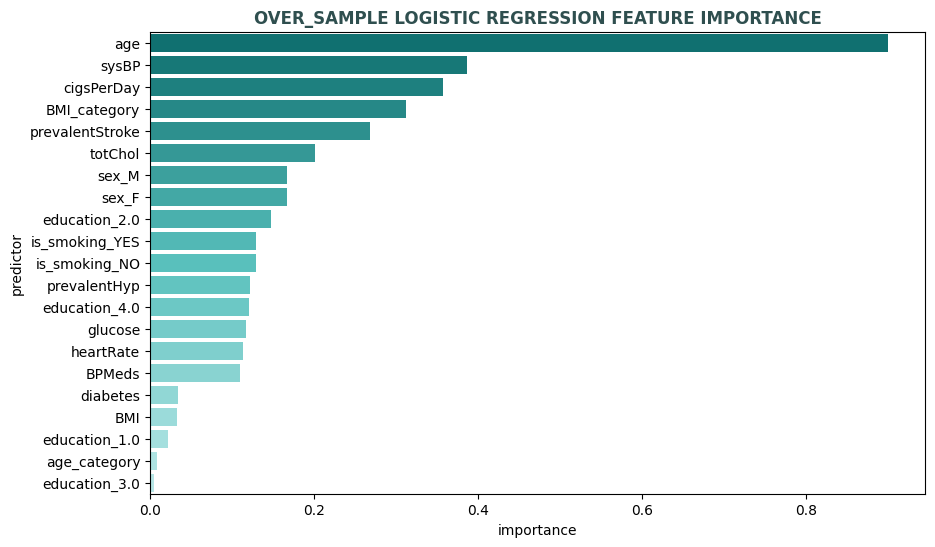

In [11]:
log_regression_over.create_barplot_feature_importance()

###  LOGISTIC REGRESSION  ON TOKEN_SMOTE DATAFRAME

-----


In [12]:
df_ts = pd.read_pickle('../data/generated_data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
title_df_ts = 'token smote'

In [14]:
log_regression_ts = Logistic_regression(df_ts, response_var, title_df_ts)

In [15]:
log_regression_ts.fit_model()

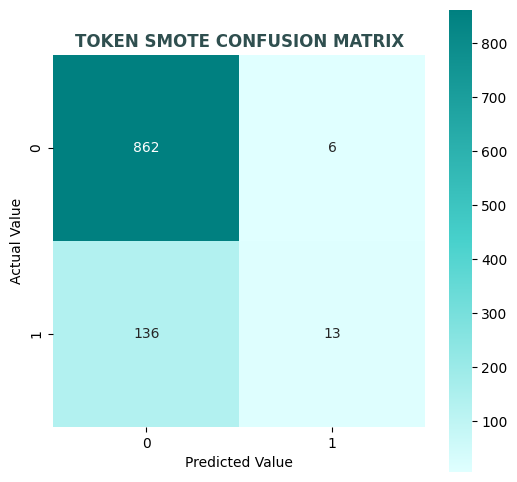

In [16]:
log_regression_ts.print_confusion_matrix()

In this instance, it is noted that the model has a tendency to identify a greater number of false negatives, and it appears to struggle with detecting positive cases. This is crucial as we are predicting a disease, therefore it is essential to identify positive cases.

In [17]:
lr_ts_results = log_regression_ts.get_metrics('TS Logistic Regression')
lr_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [18]:
log_regression_ts.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.876989,0.876989
1,BMI_category,0.593927,0.593927
7,cigsPerDay,0.502335,0.502335
3,prevalentStroke,0.432341,0.432341
9,sysBP,0.387356,0.387356
18,sex_M,0.242115,0.242115
17,sex_F,-0.241760,0.241760
12,glucose,0.143731,0.143731
14,education_2.0,-0.142728,0.142728
10,BMI,-0.137898,0.137898


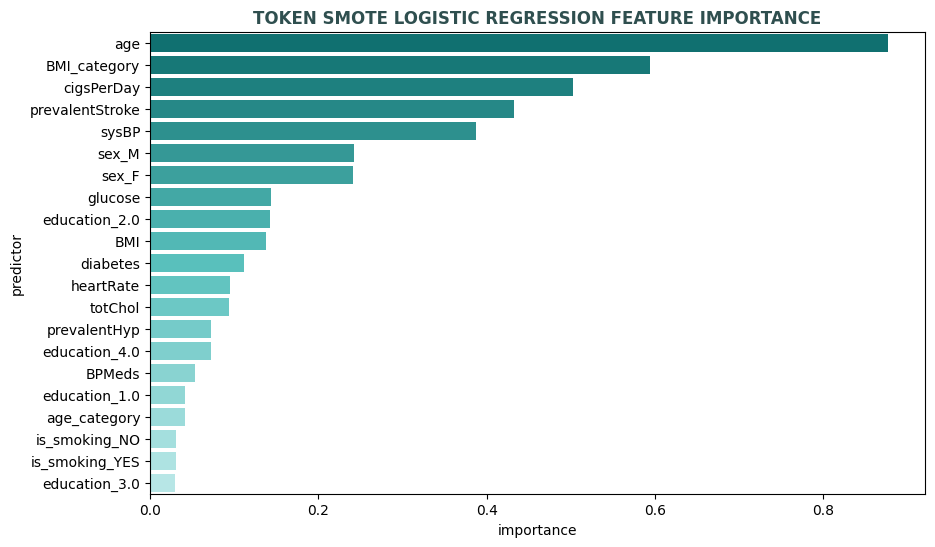

In [19]:
log_regression_ts.create_barplot_feature_importance()

### SAVE RESULTS

-----

In [20]:
all_results = pd.concat([lr_over_results, lr_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.696181,0.686690,0.692399,0.689533,0.392092,test,OVER Logistic Regression
1,0.676427,0.673614,0.698085,0.685632,0.352517,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


We have achieved acceptable metrics in the Random_Over_Sample Dataframe. Nonetheless, we will attempt new approaches since our kappa is inadequate. However, the Token_Smote dataframe shows a low kappa value, as well as low recall and F1 metrics. These results indicate that our model struggles to detect positive cases, as confirmed by examining the confusion matrix. We therefore reject these results.

In [21]:
# We store the metrics to compare with new models.

all_results.to_pickle('../data/generated_data/LR_results.pkl')